# Task #4 - Decision Tree Algorithm

#### Problem Statement: For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')
df = df.drop(['Id'], axis = 1)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

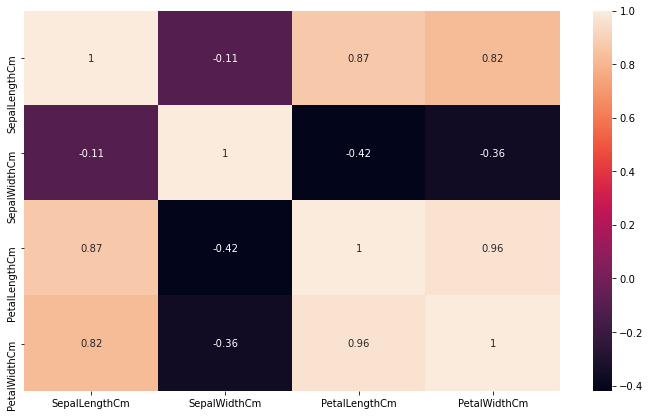

In [6]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot =True)

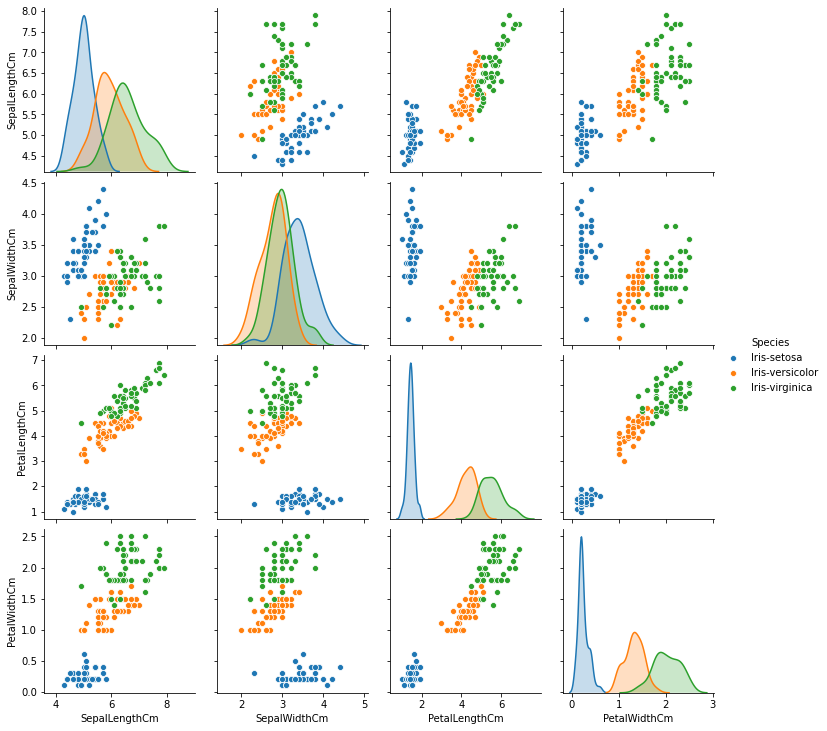

In [7]:
sns.pairplot(df,hue='Species')

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [10]:
y=df['Species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Decision Trees
We'll start just by training a single decision tree.

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Predicting the values and calculating accuracy score

In [15]:
predicted=dtree.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(predicted,y_test)))

The accuracy of the Decision Tree is 0.967


# Visualizing the Decision Tree.

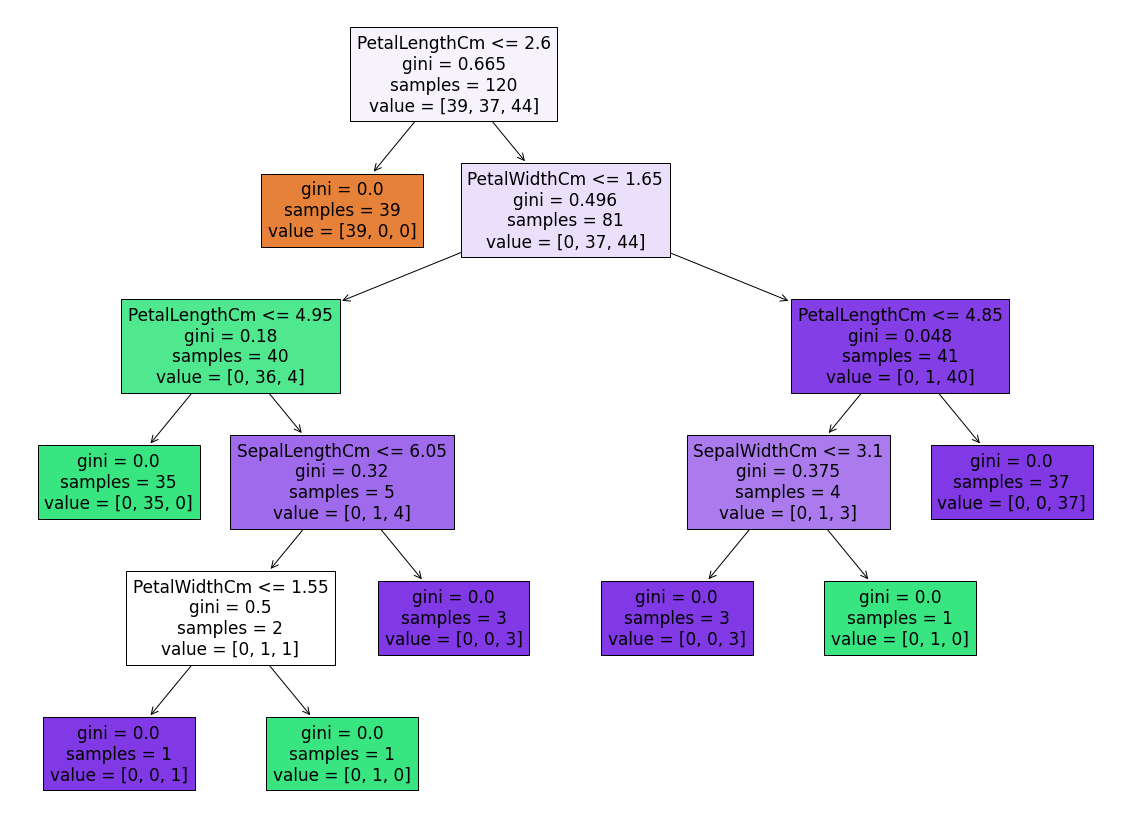

In [16]:
from sklearn import tree
fig = plt.figure(figsize =(20,15))
fig = tree.plot_tree(dtree, feature_names = df.columns, filled = 'True')
plt.show()

# Predicting the Species for new values

In [17]:
pred_species=dtree.predict([[7.5,4.1,2.5,1.3]])
print(f"The species is : {pred_species[0]}")

The species is : Iris-setosa
